In [183]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

def append_to_path(dir0): # A convenience function
    if dir0 not in sys.path:
        sys.path.append(dir0)

import spikeinterface as si
import os, sys
import numpy as np

from mountainlab_pytools import mlproc as mlp

append_to_path(os.getcwd()+'/../../mountainsort_examples/spike-collab')
from widgets.timeserieswidget import TimeseriesWidget

from gen_synth_datasets import gen_synth_datasets
from outputvisualizer import OutputVisualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
#templates='kbucket://b5ecdf1474c5/MEArec/templates/templates_30_Neuronexus-32.h5'
templates='kbucket://b5ecdf1474c5/MEArec/templates/templates_30_tetrode_mea.h5'
K=15

datasets=[]
ds0=dict(
    duration=600,
    noise_level=12,
    templates=templates,
    n_exc=int(K/2), n_inh=K-int(K/2),
    f_exc=2, f_inh=7,
    min_rate=0.5,
    st_exc=1, st_inh=3,
    channel_ids=None,
    min_dist=15
)
num_datasets=10

for j in range(1,num_datasets+1):
    ds=dict(        
        name='{}_synth'.format('{0:03d}'.format(j)),
        seed=j
    )
    for key in ds0:
        ds[key]=ds0[key]
    datasets.append(ds)
    
print('DATASETS:')
for ds in datasets:
    print(ds['name'])

DATASETS:
001_synth
002_synth
003_synth
004_synth
005_synth
006_synth
007_synth
008_synth
009_synth
010_synth


In [179]:
P=mlp.initPipeline()

JSProxyWidget(status='Not yet rendered')

In [180]:
with P:
    gen_synth_datasets(datasets,tmpdir='tmp',outdir='datasets')

001_synth


Output()

Finished pipeline.
Writing in mda format...
Loading recordings from file...
Done loading recordings...
Loading recordings from file...
Done loading recordings...
002_synth


Output()

Finished pipeline.
Writing in mda format...
Loading recordings from file...
Done loading recordings...
Loading recordings from file...
Done loading recordings...
003_synth


Output()

Finished pipeline.
Writing in mda format...
Loading recordings from file...
Done loading recordings...
Loading recordings from file...
Done loading recordings...
004_synth


Output()

Finished pipeline.
Writing in mda format...
Loading recordings from file...
Done loading recordings...
Loading recordings from file...
Done loading recordings...
005_synth


Output()

Output()

<details />

Exception: [Click to expand] Error running process mearec.gen_recording: Process returned with non-zero error code (255)

In [182]:
IX=si.MdaInputExtractor(dataset_directory='datasets/001_synth')
OX=si.MdaOutputExtractor(firings_file='datasets/001_synth/firings_true.mda')
W=TimeseriesWidget(input_extractor=IX,trange=[0,5000],width=8,height=4)
W.display()

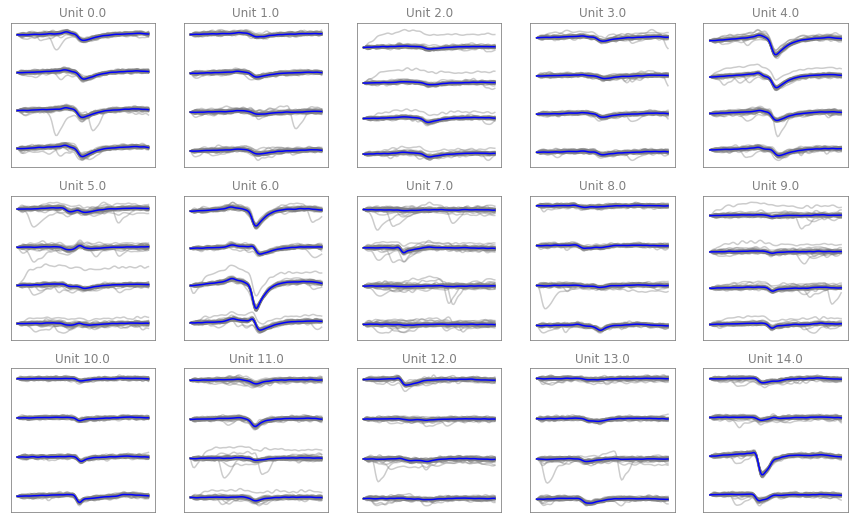

In [184]:
OV=OutputVisualizer(input_extractor=IX,output_extractor=OX)
OV.viewUnitWaveforms()